In [1]:
#Import libralies
import pandas as pd
import numpy as np

In [4]:
#Import train csv file
train_data = pd.read_csv('train.csv')
train_data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [5]:
#import test csv file
test_data = pd.read_csv('test.csv')
test_data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,0,0


### Data exploration

In [7]:
train_data.shape

(15120, 56)

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
Id                                    15120 non-null int64
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null int64
Wilderness_Area2                      15120 non-null int64
Wilderness_Area3                      15120 non-null int64
Wilderness_Area4                      15120 non-null int64
Soil_T

In [9]:
train_data.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [30]:
train_corr = train_data.corr()
train_corr.sort_values(by='Cover_Type', ascending=False)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Cover_Type,0.108363,0.016090,0.008015,0.087722,-0.010515,0.075647,-0.105662,-0.010286,-0.098905,-0.053399,...,-0.132312,-0.078955,-0.003470,0.114327,0.025726,0.071210,0.257810,0.240384,0.205851,1.000000
Soil_Type38,0.086932,0.323440,0.043860,-0.148342,0.131444,-0.008989,0.197892,0.012326,0.104682,0.069262,...,-0.049181,-0.046350,-0.008585,-0.018535,-0.005786,-0.010677,1.000000,-0.047936,-0.039795,0.257810
Soil_Type39,0.083376,0.296405,-0.031342,0.051900,0.066284,0.058981,0.120953,0.024492,-0.058979,-0.056383,...,-0.046606,-0.043924,-0.008136,-0.017565,-0.005483,-0.010118,-0.047936,1.000000,-0.037712,0.240384
Soil_Type40,0.122475,0.306755,0.007208,-0.043513,0.242304,0.227110,0.144786,-0.017234,-0.008203,0.019158,...,-0.038692,-0.036465,-0.006754,-0.014582,-0.004552,-0.008400,-0.039795,-0.037712,1.000000,0.205851
Soil_Type10,0.032292,-0.357816,0.111959,0.255804,-0.112852,0.018305,-0.213057,-0.388943,-0.283761,0.132457,...,-0.088838,-0.083724,-0.015508,-0.033481,-0.010451,-0.019287,-0.091372,-0.086588,-0.071884,0.128972
Wilderness_Area3,0.384219,0.354025,0.032578,-0.113033,0.200532,0.069884,0.124378,-0.016736,0.188611,0.131451,...,0.233901,0.219177,0.044867,0.041204,0.030237,-0.023416,0.081568,0.103275,0.017388,0.122146
Soil_Type35,0.057480,0.120157,-0.004235,-0.048855,-0.015446,-0.021662,0.065310,0.031228,0.034638,0.000662,...,-0.018021,-0.016984,-0.003146,1.000000,-0.002120,-0.003912,-0.018535,-0.017565,-0.014582,0.114327
Id,1.000000,0.185496,0.017702,-0.020168,0.099637,0.055348,-0.033028,0.000786,0.073123,0.042524,...,0.068048,0.066887,0.022520,0.057480,0.009110,0.016040,0.086932,0.083376,0.122475,0.108363
Slope,-0.020168,-0.312640,0.028148,1.000000,-0.055976,0.265314,-0.277049,-0.200072,-0.612613,-0.326887,...,-0.147258,0.072027,-0.030590,-0.048855,-0.004570,0.003129,-0.148342,0.051900,-0.043513,0.087722
Wilderness_Area4,-0.158451,-0.783651,0.075228,0.286985,-0.239303,0.027321,-0.440454,-0.137192,-0.203055,-0.046262,...,-0.146294,-0.137874,-0.025538,-0.055135,-0.017211,-0.031761,-0.150467,-0.142590,-0.118375,0.075774


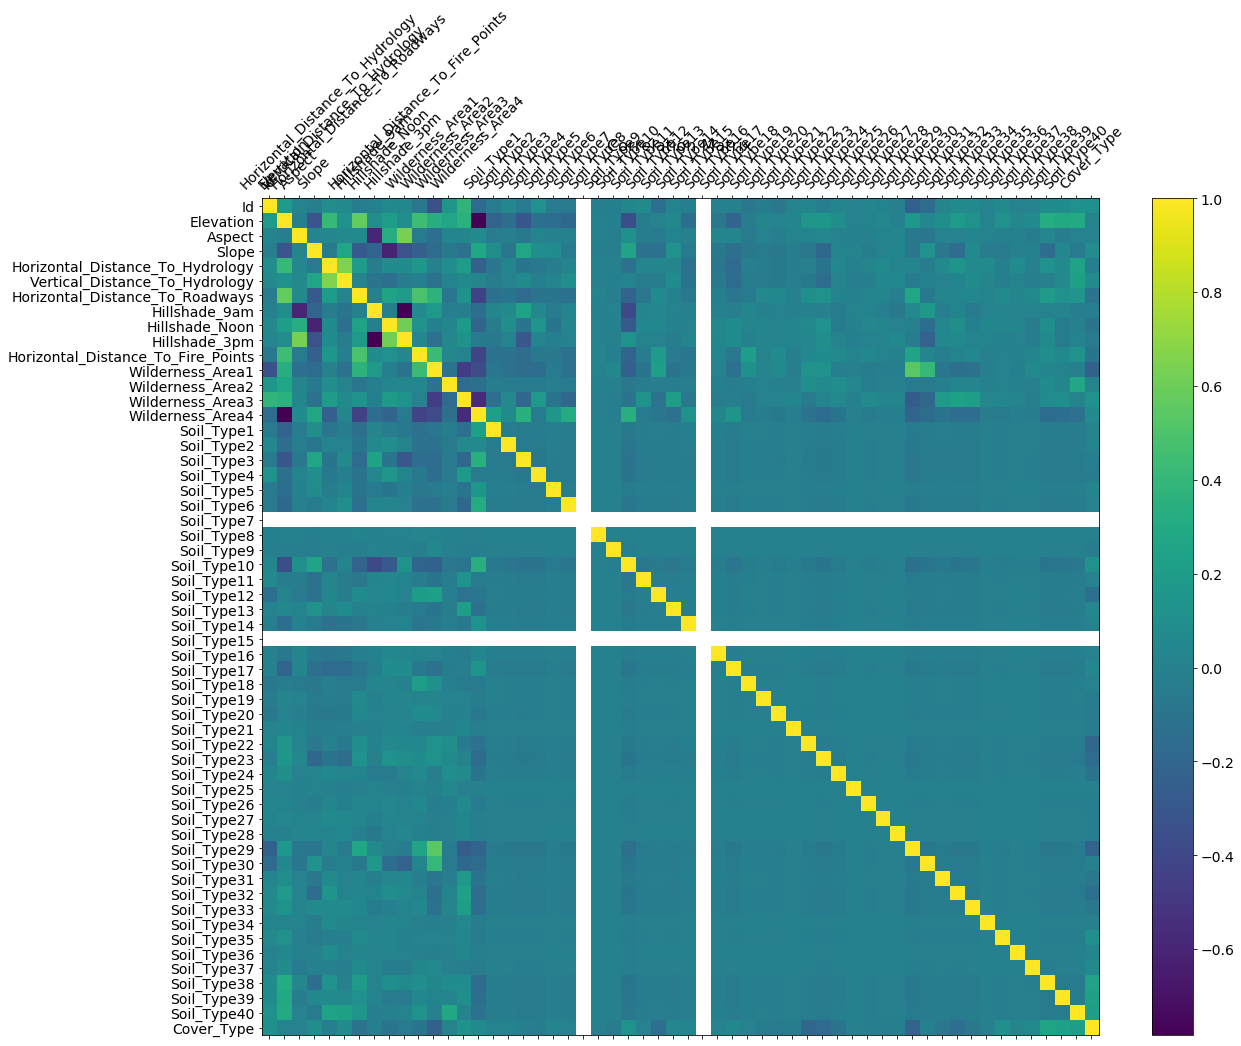

In [26]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(19, 15))
plt.matshow(train_data.corr(), fignum=f.number)
plt.xticks(range(train_data.shape[1]), train_data.columns, fontsize=14, rotation=45)
plt.yticks(range(train_data.shape[1]), train_data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [37]:
#Choose the first 15 rows
train_corr_sort = train_corr.sort_values(by='Cover_Type', ascending=False)
new_train = train_corr_sort[0:12]

In [38]:
new_train

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Cover_Type,0.108363,0.016090,0.008015,0.087722,-0.010515,0.075647,-0.105662,-0.010286,-0.098905,-0.053399,...,-0.132312,-0.078955,-0.003470,0.114327,0.025726,0.071210,0.257810,0.240384,0.205851,1.000000
Soil_Type38,0.086932,0.323440,0.043860,-0.148342,0.131444,-0.008989,0.197892,0.012326,0.104682,0.069262,...,-0.049181,-0.046350,-0.008585,-0.018535,-0.005786,-0.010677,1.000000,-0.047936,-0.039795,0.257810
Soil_Type39,0.083376,0.296405,-0.031342,0.051900,0.066284,0.058981,0.120953,0.024492,-0.058979,-0.056383,...,-0.046606,-0.043924,-0.008136,-0.017565,-0.005483,-0.010118,-0.047936,1.000000,-0.037712,0.240384
Soil_Type40,0.122475,0.306755,0.007208,-0.043513,0.242304,0.227110,0.144786,-0.017234,-0.008203,0.019158,...,-0.038692,-0.036465,-0.006754,-0.014582,-0.004552,-0.008400,-0.039795,-0.037712,1.000000,0.205851
Soil_Type10,0.032292,-0.357816,0.111959,0.255804,-0.112852,0.018305,-0.213057,-0.388943,-0.283761,0.132457,...,-0.088838,-0.083724,-0.015508,-0.033481,-0.010451,-0.019287,-0.091372,-0.086588,-0.071884,0.128972
Wilderness_Area3,0.384219,0.354025,0.032578,-0.113033,0.200532,0.069884,0.124378,-0.016736,0.188611,0.131451,...,0.233901,0.219177,0.044867,0.041204,0.030237,-0.023416,0.081568,0.103275,0.017388,0.122146
Soil_Type35,0.057480,0.120157,-0.004235,-0.048855,-0.015446,-0.021662,0.065310,0.031228,0.034638,0.000662,...,-0.018021,-0.016984,-0.003146,1.000000,-0.002120,-0.003912,-0.018535,-0.017565,-0.014582,0.114327
Id,1.000000,0.185496,0.017702,-0.020168,0.099637,0.055348,-0.033028,0.000786,0.073123,0.042524,...,0.068048,0.066887,0.022520,0.057480,0.009110,0.016040,0.086932,0.083376,0.122475,0.108363
Slope,-0.020168,-0.312640,0.028148,1.000000,-0.055976,0.265314,-0.277049,-0.200072,-0.612613,-0.326887,...,-0.147258,0.072027,-0.030590,-0.048855,-0.004570,0.003129,-0.148342,0.051900,-0.043513,0.087722
Wilderness_Area4,-0.158451,-0.783651,0.075228,0.286985,-0.239303,0.027321,-0.440454,-0.137192,-0.203055,-0.046262,...,-0.146294,-0.137874,-0.025538,-0.055135,-0.017211,-0.031761,-0.150467,-0.142590,-0.118375,0.075774


In [59]:
needed_data = train_data.loc[:,['Id','Soil_Type38','Soil_Type39','Soil_Type40','Soil_Type10','Wilderness_Area3',
                               'Soil_Type35','Slope','Wilderness_Area4','Vertical_Distance_To_Hydrology',
                               'Soil_Type37','Cover_Type']]
new_df = pd.DataFrame(needed_data)

In [62]:
new_df.head()

,Id,Soil_Type38,Soil_Type39,Soil_Type40,Soil_Type10,Wilderness_Area3,Soil_Type35,Slope,Wilderness_Area4,Vertical_Distance_To_Hydrology,Soil_Type37,Cover_Type
0,1,0,0,0,0,0,0,3,0,0,0,5
1,2,0,0,0,0,0,0,2,0,-6,0,5
2,3,0,0,0,0,0,0,9,0,65,0,2
3,4,0,0,0,0,0,0,18,0,118,0,2
4,5,0,0,0,0,0,0,2,0,-1,0,5


In [64]:
new_df.shape

(15120, 12)

In [68]:
#import libralies
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [71]:
#check with original numbers
train_x = train_data.drop(['Id','Cover_Type'], axis=1) 
train_y = train_data['Cover_Type']
(train_x, test_x ,train_y, test_y) = train_test_split(train_x, train_y, test_size = 0.3, random_state = 42)

In [72]:
# model creation
random_forest = RandomForestClassifier(max_depth=30, n_estimators=30, random_state=42)
random_forest.fit(train_x, train_y)

# prediction number
y_pred = random_forest.predict(test_x)

#accuracy of the model
trainaccuracy_random_forest = random_forest.score(train_x, train_y)
print('TrainAccuracy: {}'.format(trainaccuracy_random_forest))

#
accuracy_random_forest = accuracy_score(test_y, y_pred)
print('Accuracy: {}'.format(accuracy_random_forest))

TrainAccuracy: 0.9997165532879818
Accuracy: 0.8518518518518519


In [75]:
#import libraries
import seaborn as sns
from sklearn.metrics import confusion_matrix
from pandas.plotting import scatter_matrix

Text(91.68, 0.5, 'true value')

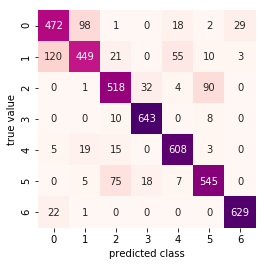

In [76]:
#confusion matrix
mat = confusion_matrix(test_y, y_pred)
sns.heatmap(mat, square=True, annot=True, cbar=False, fmt='d', cmap='RdPu')
plt.xlabel('predicted class')
plt.ylabel('true value')

In [80]:
# Visualize the importance of each variable
importance = pd.DataFrame({ 'Variables' :train_x.columns, 'Importance rate' :random_forest.feature_importances_})
importance

,Variables,Importance rate
0,Elevation,0.220503
1,Aspect,0.050079
2,Slope,0.037002
3,Horizontal_Distance_To_Hydrology,0.065367
4,Vertical_Distance_To_Hydrology,0.053685
5,Horizontal_Distance_To_Roadways,0.096716
6,Hillshade_9am,0.052240
7,Hillshade_Noon,0.048153
8,Hillshade_3pm,0.048652
9,Horizontal_Distance_To_Fire_Points,0.070776


In [81]:
test_data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,0,0


In [84]:
new_test = test_data.drop('Id',axis=1)

In [85]:
new_test.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2680,354,14,0,0,2684,196,214,156,6645,...,0,0,0,0,0,0,0,0,0,0
1,2683,0,13,0,0,2654,201,216,152,6675,...,0,0,0,0,0,0,0,0,0,0
2,2713,16,15,0,0,2980,206,208,137,6344,...,0,0,0,0,0,0,0,0,0,0
3,2709,24,17,0,0,2950,208,201,125,6374,...,0,0,0,0,0,0,0,0,0,0
4,2706,29,19,0,0,2920,210,195,115,6404,...,0,0,0,0,0,0,0,0,0,0


In [86]:
# Prediction of Cover_Type
X_pred = np.array(new_test)
y_pred = random_forest.predict(X_pred)
print (y_pred)

[2 2 1 ... 3 3 3]


In [87]:
test_data['Cover_Type'] = y_pred
test_data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,0,2
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,0,2
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,0,1
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,0,2
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,0,2


In [99]:
test_submit = test_data.loc[:,['Id','Cover_Type']]
test_submit.head()

,Id,Cover_Type
0,15121,2
1,15122,2
2,15123,1
3,15124,2
4,15125,2


In [100]:
test_submit.shape

(565892, 2)

In [101]:
test_submit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565892 entries, 0 to 565891
Data columns (total 2 columns):
Id            565892 non-null int64
Cover_Type    565892 non-null int64
dtypes: int64(2)
memory usage: 8.6 MB


In [102]:
test_submit.to_csv("test_submit.csv", index=False)